In [3]:
import selenium.webdriver as webdriver
from selenium.webdriver.firefox.options import Options as FirefoxOptions
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
import random
import time

In [183]:
#Install firefox
!apt-get update
!apt install firefox

#Install selenium
!pip install selenium

#Updating and installing firefox libraries
!apt-get update && apt-get install -y wget bzip2 libxtst6 libgtk-3-0 libx11-xcb-dev libdbus-glib-1-2 libxt6 libpci-dev && rm -rf /var/lib/apt/lists/*

#Installing Geck Driver
!wget https://github.com/mozilla/geckodriver/releases/download/v0.24.0/geckodriver-v0.24.0-linux64.tar.gz
!tar -xvzf geckodriver*
!chmod +x geckodriver
!export PATH=$PATH:/path-to-extracted-file/.

zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

DEPRECATION: ipykernel 6.0.0 has a non-standard dependency specifier matplotlib-inline<0.2.0appnope,>=0.1.0; platform_system == "Darwin". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ipykernel or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
zsh:1: command not found: apt-get
--2023-12-06 11:25:54--  https://github.com/mozilla/geckodriver/releases/download/v0.24.0/geckodriver-v0.24.0-linux64.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-pr

In [ ]:
# Define job positions and locations as lists
positions = ["data scientist", "data analyst", "manager of analytics", "director of analytics"]
locations = ["Canada", "USA"]

# Function to construct a URL for a given job position and location
def get_url(position, location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(position.replace(' ', '+'), location.replace(' ', '+'))
    return url

# Initialize an empty DataFrame to store the results
dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])


In [ ]:
# create a new Firefox driver
driver_path = '/content/geckodriver'
firefox_driver_path = '/content/geckodriver'
user_agent = 'Mozilla'
firefox_options = FirefoxOptions()
firefox_options.add_argument('--headless')
driver = webdriver.Firefox(options=firefox_options)

In [ ]:
## Number of postings to scrape
postings = 150
for position in positions:
    for location in locations:
        url = get_url(position, location)
        # Scraping a fixed number of postings (modify as needed)
        # print(url)
        jn=0
        for i in range(0, postings, 10):
            driver.get(url + "&start=" + str(i))
            driver.implicitly_wait(3)

            jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')
            print(jobs)

            for job in jobs:
                #print(job)
                result_html = job.get_attribute('innerHTML')
                #print(result_html)
                soup = BeautifulSoup(result_html, 'html.parser')
                #print(soup , '\n')

                jn += 1

                liens = job.find_elements(By.TAG_NAME, "a")
                #print(liens)
                links = liens[0].get_attribute("href")
                #print(links)

                title = soup.select('.jobTitle')[0].get_text().strip()
                print(title)

                #company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()
                #print(company)
                try:
                    company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()
                    #print(company)
                except:
                    company = 'Nan'
                print(company)
                #location = soup.select('.companyLocation')[0].get_text().strip() #origional
                #location = soup.select('.company_location')[0].get_text().strip()
                location = soup.find_all(attrs={'data-testid': 'text-location'})[0].get_text().strip()
                print(location)
                try:
                    salary = soup.select('.salary-snippet-container')[0].get_text().strip()
                except:
                    salary = 'NaN'
                try:
                    rating = soup.select('.ratingNumber')[0].get_text().strip()
                except:
                    rating = 'NaN'
                try:
                    date = soup.select('.date')[0].get_text().strip()
                except:
                    date = 'NaN'
                try:
                    description = soup.select('.job-snippet')[0].get_text().strip()
                except:
                    description = ''

                dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
                                                "Company": company,
                                                'Location': location,
                                                'Rating': rating,
                                                'Date': date,
                                                "Salary": salary,
                                                "Description": description,
                                                "Links": links}])], ignore_index=True)
                print("Job number {0:4d} added - {1:s}".format(jn,title))

[<selenium.webdriver.remote.webelement.WebElement (session="e5788d09-c7ee-487b-ba19-0a6d8dcadc8e", element="0971c667-9f51-4802-8831-94be413ac6da")>]
VISS/AXIS Ai Developer - (Ai modeling, data engineering, X-ray imaging) - Kentucky (BOSK)
SK Battery America
Kentucky
Job number    1 added - VISS/AXIS Ai Developer - (Ai modeling, data engineering, X-ray imaging) - Kentucky (BOSK)
[<selenium.webdriver.remote.webelement.WebElement (session="e5788d09-c7ee-487b-ba19-0a6d8dcadc8e", element="367f9ffc-cf2d-4397-8c50-3c3310a4e4fc")>]
VISS/AXIS Ai Developer - (Ai modeling, data engineering, X-ray imaging) - Kentucky (BOSK)
SK Battery America
Kentucky
Job number    2 added - VISS/AXIS Ai Developer - (Ai modeling, data engineering, X-ray imaging) - Kentucky (BOSK)
[<selenium.webdriver.remote.webelement.WebElement (session="e5788d09-c7ee-487b-ba19-0a6d8dcadc8e", element="795175c7-91f2-457b-8863-7c3ed92b6d1c")>, <selenium.webdriver.remote.webelement.WebElement (session="e5788d09-c7ee-487b-ba19-0a6d8d

In [ ]:
print(dataframe.head())

                                               Title                Company  \
0  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   
1  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   
2  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   
3    Principal Statistical Programmer - CRO - Remote  Compass Life Sciences   
4  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   

                  Location Rating                       Date           Salary  \
0                 Kentucky    NaN  EmployerActive 3 days ago              NaN   
1                 Kentucky    NaN  EmployerActive 3 days ago              NaN   
2                 Kentucky    NaN  EmployerActive 3 days ago              NaN   
3  Remote in United States    NaN  PostedPosted 30+ days ago  $145,000 a year   
4                 Kentucky    NaN  EmployerActive 3 days ago              NaN   

                                      

In [ ]:
dataframe.shape

(1021, 8)

In [ ]:
Links_list = dataframe['Links'].tolist()

In [ ]:
descriptions=[]
for i in Links_list:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe['Descriptions'] = descriptions

In [ ]:
# Convert the dataframe to a csv file
date = datetime.today().strftime('%Y-%m-%d')

# Convert lists to string for filename
position_str = "_".join(positions).replace(' ', '')
location_str = "_".join(locations).replace(' ', '')

# Construct filename
filename = f"{date}_{position_str}_{location_str}.csv"

# Save DataFrame to CSV
dataframe.to_csv(filename, index=False)

# Display first few rows of the DataFrame
#dataframe.head()
print(dataframe.head())
print(dataframe.shape)

                                               Title                Company  \
0  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   
1  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   
2  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   
3    Principal Statistical Programmer - CRO - Remote  Compass Life Sciences   
4  VISS/AXIS Ai Developer - (Ai modeling, data en...     SK Battery America   

                  Location Rating                       Date           Salary  \
0                 Kentucky    NaN  EmployerActive 3 days ago              NaN   
1                 Kentucky    NaN  EmployerActive 3 days ago              NaN   
2                 Kentucky    NaN  EmployerActive 3 days ago              NaN   
3  Remote in United States    NaN  PostedPosted 30+ days ago  $145,000 a year   
4                 Kentucky    NaN  EmployerActive 3 days ago              NaN   

                                      

## Text Embedding

In [ ]:
# Path to the CSV file
csv_file_path = '/content/webscraping_results.csv'

# Reading the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

## Data cleanning

In [ ]:
# check for missing values
print(df.isnull().sum())
import re

# Set the display option to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

def convert_salary(salary_str):
    if pd.isnull(salary_str):
        return None
    
    # Extract numbers from the string
    numbers = re.findall(r'\d+', salary_str.replace(',', ''))
    if not numbers:
        return None
    
    # Assuming the salary string contains yearly salary info
    annual_salary = int(numbers[0])
    
    # Handle other cases (e.g., hourly, weekly, monthly salaries) here if needed
    # Example: if 'hour' in salary_str: annual_salary = int(numbers[0]) * 40 * 52 (assuming 40 hours/week, 52 weeks/year)
    return annual_salary

# Apply the conversion function
df['Salary'] = df['Salary'].apply(convert_salary)

# Impute missing values
median_salary = df['Salary'].dropna().median()
df['Salary'].fillna(median_salary, inplace=True)

# drop rows with missing values
df.drop('Rating', axis=1, inplace=True)

# Displaying the DataFrame to verify changes
df.head()


Title              0
Company            0
Location           0
Rating          1021
Date               0
Salary           459
Description        0
Links              0
Descriptions       0
dtype: int64


,Title,Company,Location,Date,Salary,Description,Links,Descriptions
0,"VISS/AXIS Ai Developer - (Ai modeling, data en...",SK Battery America,Kentucky,EmployerActive 3 days ago,96015.00,Data Management & Retrieval: Design and manage...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Come join us and build your future with SK bat...
1,"VISS/AXIS Ai Developer - (Ai modeling, data en...",SK Battery America,Kentucky,EmployerActive 3 days ago,96015.00,Data Management & Retrieval: Design and manage...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Come join us and build your future with SK bat...
2,"VISS/AXIS Ai Developer - (Ai modeling, data en...",SK Battery America,Kentucky,EmployerActive 3 days ago,96015.00,Data Management & Retrieval: Design and manage...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Come join us and build your future with SK bat...
3,Principal Statistical Programmer - CRO - Remote,Compass Life Sciences,Remote in United States,PostedPosted 30+ days ago,145000.00,This is a broad role that will provide the opp...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Compass Life Sciences are working with a growt...
4,"VISS/AXIS Ai Developer - (Ai modeling, data en...",SK Battery America,Kentucky,EmployerActive 3 days ago,96015.00,Data Management & Retrieval: Design and manage...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Come join us and build your future with SK bat...


## Exploratory data analysis and feature engineering:

In [6]:
skills = ["statistics","big data","artificial intelligence",
          "tableau","software development","cybersecurity","sql","python","data analysis", 
          "machine learning","r", "deep learning", "problem solving", "communications", 
          "power bi","experimentation","risk analytics",
          "modelling","nlp","healthcare","cloud computing","teamwork"]
extracted_skills = []
for description in df['Descriptions']:
    # Lowercasing the description for case-insensitive matching
    description_lower = description.lower()

    for skill in skills:
        if re.search(r'\b' + re.escape(skill) + r'\b', description_lower):
     
            extracted_skills.append(skill)

In [ ]:
import openai
openai.api_key = ''

response = openai.Completion.create(
  model="text-davinci-003",
  prompt="List many important skills for data science and analytics job roles or programmer.",
  max_tokens=150
)

In [8]:
chat_gpt_skills = response.choices[0].text.strip().split('\n')

In [48]:
# Combine with manually defined skills
combined_skills = list(set(skills + chat_gpt_skills))
combined_skills

['12. Business Acumen and Strategy',
 '1. Data Visualization ',
 '13. Ability to Find Insights from Data',
 'experimentation',
 'statistics',
 '5. Programming (R, Python, SQL, Java, etc.)',
 'artificial intelligence',
 'data analysis',
 'healthcare',
 'r',
 'machine learning',
 'modelling',
 'problem solving',
 'risk analytics',
 'cybersecurity',
 '11. Communication and Presentation Skills',
 '14. Data Cleaning and Preprocessing',
 '7. Cloud Computing (AWS, Azure, etc.)',
 '3. Machine Learning and Artificial Intelligence',
 'big data',
 '9. Data Security and Privacy Considerations',
 '15. Expertise in',
 'python',
 '2. Statistical Analysis',
 'nlp',
 'communications',
 'software development',
 'power bi',
 'cloud computing',
 '6. Database Management (SQL, NoSQL, etc.)',
 'deep learning',
 '8. Big Data Concepts (Hadoop, MapReduce, etc.)',
 '10. Strong Analytical and Problem-Solving Skills',
 'teamwork',
 '4. Data Mining and Data Wrangling',
 'tableau',
 'sql']

In [ ]:
import re
refined_skills = set()

# New set to store the modified skills
new_refined_skills = set()

for skill in combined_skills:
    # Remove numeric prefixes
    skill = re.sub(r"^\d+\.\s*","", skill)
    skill = skill.replace('and ', '')
    skill = skill.replace(')', '')
    

    # Further refine skills if they are too long
    skill_words = skill.split()
    if len(skill_words) >= 3:
        # This is an arbitrary choice; adjust as needed
        # Example: take the last two words in longer phrases
        skill = ' '.join(skill_words[-2:])
        for i in skill_words:
            # if 'etc' in i:
            skill = skill.split(', etc')[0]
            skill = skill.rstrip()
            # pattern = re.compile(r'n\s')
    refined_skills.add(skill)

# # Manually handle specific cases
if 'Expertise in' in refined_skills:
    refined_skills.remove('Expertise in')  # Remove duplicate
# # Manually handle specific cases
if 'artificial intelligence' in refined_skills:
    refined_skills.remove('Artificial Intelligence')  # Remove duplicate
if 'Querying Design' in refined_skills:
    refined_skills.remove('Querying Design')  # Remove duplicate
if 'Communication Presentation' in refined_skills:
    refined_skills.remove('Communication Presentation')  # Remove duplicate
if 'acumen strategy' in refined_skills:
    refined_skills.remove('acumen strategy')  # Remove duplicate
if 'cleaning preprocessing' in refined_skills:
    refined_skills.remove('cleaning preprocessing')  # Remove duplicate
if 'privacy considerations' in refined_skills:
    refined_skills.remove('privacy considerations')  # Remove duplicate

refined_skills = [skill.lower() for skill in refined_skills]
refined_skills = list(refined_skills)
del refined_skills[11]
del refined_skills[15]
del refined_skills[16]
del refined_skills[21]
refined_skills.append('data visualization')
refined_skills


['java',
 'experimentation',
 'azure',
 'statistics',
 'artificial intelligence',
 'data analysis',
 'healthcare',
 'r',
 'machine learning',
 'modelling',
 'problem solving',
 'risk analytics',
 'cybersecurity',
 'problem-solving skills',
 'data wrangling',
 'big data',
 'python',
 'nlp',
 'communications',
 'software development',
 'power bi',
 'presentation skills',
 'cloud computing',
 'from data',
 'deep learning',
 'nosql',
 'statistical analysis',
 'teamwork',
 'mapreduce',
 'tableau',
 'sql',
 'data visualization']

In [138]:
import spacy
import numpy as np
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')

# Add patterns to the matcher
patterns = [nlp.make_doc(skill) for skill in refined_skills]
matcher.add("SKILLS", patterns)

# Extract skills using the matcher
extracted_skills_spacy = []
for description in df['Descriptions']:
    doc = nlp(description.lower())
    matches = matcher(doc)
    extracted_skills_spacy.extend([doc[start:end].text for match_id, start, end in matches])


In [ ]:
refined_skills_set = set(refined_skills)
extracted_skills_spacy_set = set(extracted_skills_spacy)

skills_not_in_refined = extracted_skills_spacy_set - refined_skills_set
skills_not_in_extracted = refined_skills_set - extracted_skills_spacy_set
skills_not_in_extracted, skills_not_in_refined


(set(), set())

Counter({'sql': 601, 'data analysis': 564, 'healthcare': 525, 'machine learning': 488, 'python': 467, 'statistics': 434, 'tableau': 252, 'r': 244, 'data visualization': 239, 'power bi': 174, 'communications': 168, 'problem-solving skills': 134, 'statistical analysis': 126, 'problem solving': 93, 'big data': 88, 'teamwork': 84, 'azure': 83, 'presentation skills': 77, 'artificial intelligence': 73, 'software development': 67, 'deep learning': 62, 'experimentation': 55, 'from data': 46, 'java': 43, 'nlp': 39, 'cybersecurity': 30, 'nosql': 29, 'cloud computing': 20, 'modelling': 17, 'risk analytics': 13, 'data wrangling': 5, 'mapreduce': 3})


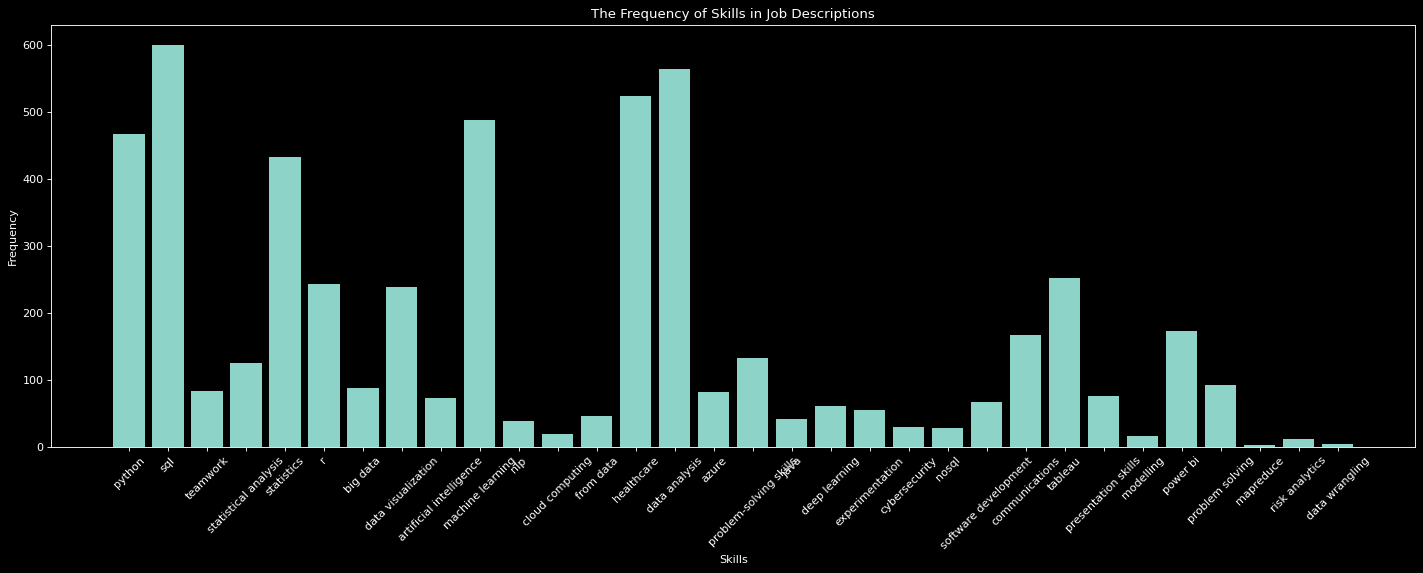

In [140]:
from collections import Counter
skill_frequency = Counter(extracted_skills_spacy)
print(skill_frequency)
import matplotlib.pyplot as plt

# Top N skills to display
top_skills = dict(skill_frequency)
plt.figure(figsize=(22, 7), dpi=80)
plt.bar(top_skills.keys(), top_skills.values())
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('The Frequency of Skills in Job Descriptions')
plt.xticks(rotation=45)
plt.show()



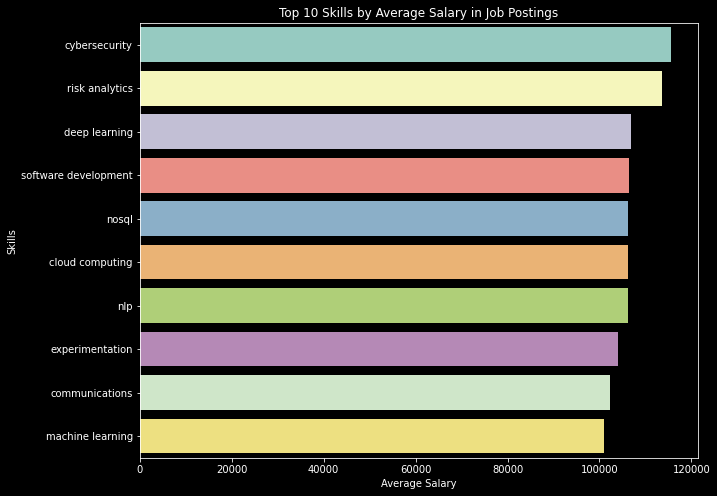

In [141]:
import seaborn as sns
for skill in refined_skills:
    df[skill] = df['Descriptions'].str.contains(skill, case=False, na=False).astype(int)

# Now calculate the average salary for each skill
average_salary_by_skill = {skill: df[df[skill] == 1]['Salary'].mean() for skill in extracted_skills_spacy}

# Sorting the skills by average salary
sorted_average_salary_by_skill = dict(sorted(average_salary_by_skill.items(), key=lambda item: item[1], reverse=True))

# We'll visualize the top 10 skills by average salary
top_skills_by_salary = list(sorted_average_salary_by_skill.items())[:10]
skills_by_salary, avg_salaries = zip(*top_skills_by_salary)

plt.figure(figsize=(10, 8))
sns.barplot(x=list(avg_salaries), y=list(skills_by_salary))
plt.title('Top 10 Skills by Average Salary in Job Postings')
plt.xlabel('Average Salary')
plt.ylabel('Skills')
plt.show()

## Hierarchical clustering implementation

In [142]:
# Initialize a DataFrame to hold the binary representation of skills
binary_skills_df = pd.DataFrame(0, index=df.index, columns=refined_skills)
# binary_skills_df.drop('Artificial Intelligence', axis=1, inplace=True)

# Populate the DataFrame with 1 if the skill is present in the description, 0 otherwise
for skill in refined_skills:
    binary_skills_df[skill] = df['Descriptions'].str.contains(r'\b' + re.escape(skill) + r'\b', case=False, regex=True).astype(int)
# binary_skills_df.drop('Artificial Intelligence', axis=1, inplace=True)
binary_skills_df.head()

,java,experimentation,azure,statistics,artificial intelligence,data analysis,healthcare,r,machine learning,modelling,...,cloud computing,from data,deep learning,nosql,statistical analysis,teamwork,mapreduce,tableau,sql,data visualization
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [143]:
# Compute the co-occurrence matrix by taking the dot product of the binary matrix with its transpose
co_occurrence_matrix = np.dot(binary_skills_df.T, binary_skills_df.values)
# co_occurrence_matrix

In [144]:
# The maximum co-occurrence will represent the minimum distance (most similar or related skills)
max_co_occurrence = np.max(co_occurrence_matrix)

# Subtract the co-occurrence values from the max value to create the distance matrix
distance_matrix = max_co_occurrence - co_occurrence_matrix

# Set the diagonal to 0, as the distance from a skill to itself should be zero
np.fill_diagonal(distance_matrix, 0)
distance_matrix

array([[  0, 407, 403, ..., 396, 376, 397],
       [407,   0, 407, ..., 397, 385, 396],
       [403, 407,   0, ..., 392, 361, 397],
       ...,
       [396, 397, 392, ...,   0, 245, 297],
       [376, 385, 361, ..., 245,   0, 281],
       [397, 396, 397, ..., 297, 281,   0]])

/var/folders/q3/0rjm6gb921s0ghz13gkws7kw0000gn/T/ipykernel_38386/572886990.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


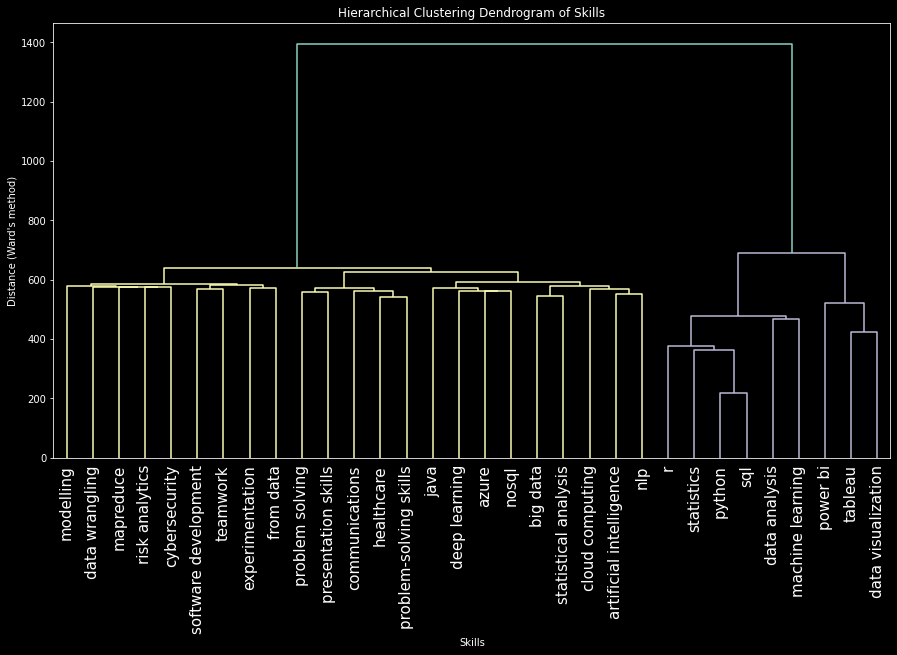

In [145]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical clustering using the distance matrix
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(15, 8))
dendrogram(Z, labels=binary_skills_df.columns, leaf_rotation=90, leaf_font_size=15)
plt.title('Hierarchical Clustering Dendrogram of Skills')
plt.xlabel('Skills')
plt.ylabel('Distance (Ward\'s method)')
plt.show()


/var/folders/q3/0rjm6gb921s0ghz13gkws7kw0000gn/T/ipykernel_38386/2216745141.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


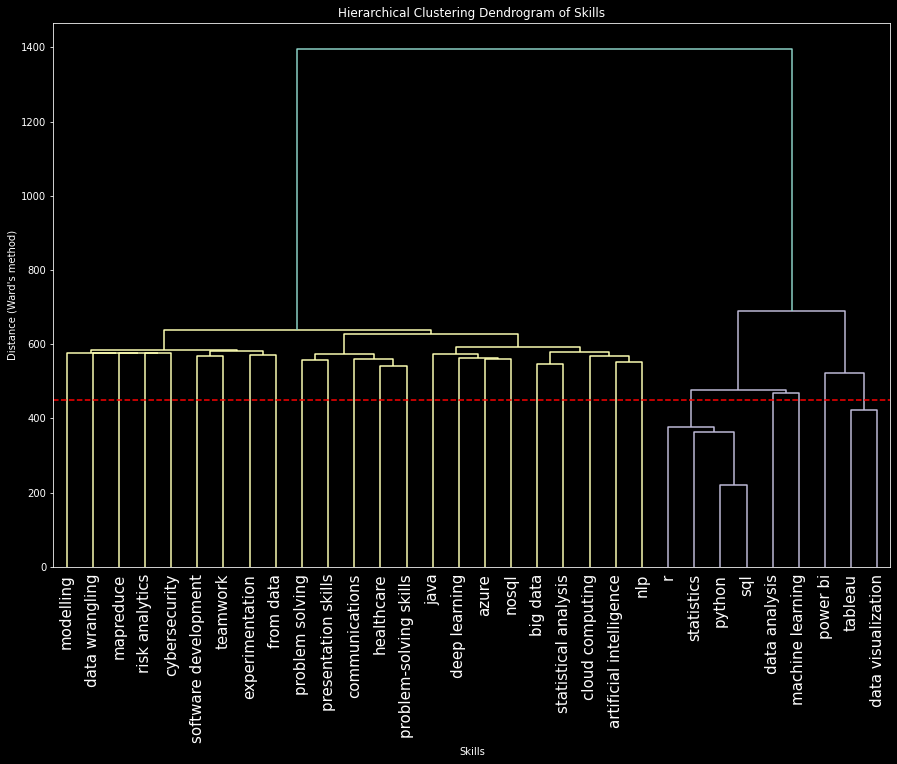

Cluster 18: java
Cluster 8: experimentation
Cluster 15: azure
Cluster 24: statistics, r, python, sql
Cluster 21: artificial intelligence
Cluster 25: data analysis
Cluster 12: healthcare
Cluster 26: machine learning
Cluster 5: modelling
Cluster 10: problem solving
Cluster 1: risk analytics
Cluster 2: cybersecurity
Cluster 13: problem-solving skills
Cluster 4: data wrangling
Cluster 19: big data
Cluster 22: nlp
Cluster 14: communications
Cluster 6: software development
Cluster 28: power bi
Cluster 11: presentation skills
Cluster 23: cloud computing
Cluster 9: from data
Cluster 17: deep learning
Cluster 16: nosql
Cluster 20: statistical analysis
Cluster 7: teamwork
Cluster 3: mapreduce
Cluster 27: tableau, data visualization


In [146]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
# Perform hierarchical clustering using the distance matrix
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=binary_skills_df.columns, leaf_rotation=90, leaf_font_size=15)
plt.title('Hierarchical Clustering Dendrogram of Skills')
plt.xlabel('Skills')
plt.ylabel('Distance (Ward\'s method)')

# Determine the max_d for your cutoff by visually inspecting the dendrogram
max_d = 450  # This is an example value, adjust it according to your dendrogram

# Draw a horizontal line at the cutoff distance
plt.axhline(y=max_d, color='red', linestyle='--')

# Show the plot
plt.show()

# Retrieve the clusters at the specified distance level
clusters = fcluster(Z, max_d, criterion='distance')

# Map each skill to its cluster
skill_to_cluster = {skill: cluster for skill, cluster in zip(binary_skills_df.columns, clusters)}

# Group skills by cluster
clustered_skills = {}
for skill, cluster in skill_to_cluster.items():
    clustered_skills.setdefault(cluster, []).append(skill)

# Print the clusters and their members
for cluster, skills in clustered_skills.items():
    print(f"Cluster {cluster}: {', '.join(skills)}")


In [181]:
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters (courses)
num_clusters = 9
# Get the cluster labels for each skill
clusters = fcluster(Z, num_clusters, criterion='maxclust')
# Map each skill to its cluster
skill_to_cluster = pd.Series(clusters, index=binary_skills_df.columns)
# Group skills by cluster
clustered_courses = skill_to_cluster.groupby(skill_to_cluster).apply(lambda x: x.index.tolist())

# Print the courses and their corresponding skills
for i, course in enumerate(clustered_courses, 1):
    print(f"Course {i}: {', '.join(course)}")
print("----------------------------------------")
print("Modified courses:")

# Manually adjusted courses
adjusted_courses = {
    1: ['modelling', 'risk analytics', 'data wrangling'],  # Focused on analytics and modelling
    2: ['cybersecurity', 'software development', 'teamwork'],  # Focused on software development and security
    3: ['experimentation', 'problem solving', 'problem-solving skills'],  # Focused on research and problem-solving
    4: ['healthcare', 'communications', 'presentation skills'],  # Focused on healthcare and communication
    5: ['java', 'azure', 'nosql'],  # Focused on programming and databases
    6: ['deep learning', 'artificial intelligence', 'machine learning'],  # Focused on AI and machine learning
    7: ['big data', 'nlp', 'cloud computing'],  # Focused on big data and cloud services
    8: ['statistics', 'data analysis', 'sql'],  # Focused on statistics and data analysis
    9: ['python', 'r', 'statistical analysis'],  # Programming languages for data science
    10: ['power bi', 'tableau', 'data visualization']  # Data visualization tools
}

# Note: Adjust the groups based on the logical flow of skills that should be learned together.
# For example, 'java', 'azure', 'nosql' might be grouped together because they relate to software development and databases.
# Similarly, 'deep learning', 'artificial intelligence', 'machine learning' are grouped together because they are all subfields of AI.

# Print adjusted courses
for course_id, skills in adjusted_courses.items():
    print(f"Course {course_id}: {', '.join(skills)}")


Course 1: modelling, risk analytics, cybersecurity, data wrangling, mapreduce
Course 2: software development, teamwork
Course 3: experimentation, from data
Course 4: healthcare, problem solving, problem-solving skills, communications, presentation skills
Course 5: java, azure, deep learning, nosql
Course 6: big data, statistical analysis
Course 7: artificial intelligence, nlp, cloud computing
Course 8: statistics, data analysis, r, machine learning, python, sql
Course 9: power bi, tableau, data visualization
----------------------------------------
Modified courses:
Course 1: modelling, risk analytics, data wrangling
Course 2: cybersecurity, software development, teamwork
Course 3: experimentation, problem solving, problem-solving skills
Course 4: healthcare, communications, presentation skills
Course 5: java, azure, nosql
Course 6: deep learning, artificial intelligence, machine learning
Course 7: big data, nlp, cloud computing
Course 8: statistics, data analysis, sql
Course 9: python

## Feature Engineering for K means

In [195]:
# Group the data by location and sum up the binary skills dataframe
regional_demand = binary_skills_df.groupby(df['Location']).sum()

# Transpose the dataframe to have skills as rows and locations as columns
regional_demand = regional_demand.T

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the regional demand data
scaler = StandardScaler()
regional_demand_scaled = scaler.fit_transform(regional_demand)

# Apply PCA to the scaled regional demand data
# You can choose the number of components based on the explained variance
# For example, we'll choose 10 components here
pca = PCA(n_components=5)
regional_demand_pca = pca.fit_transform(regional_demand_scaled)
regional_demand_pca.shape


(32, 5)

In [196]:
from sklearn.decomposition import PCA
# Convert refined_skills into a DataFrame index
skills_index = pd.Index(refined_skills, name='Skill')

# Initialize a new DataFrame using this index
features_df = pd.DataFrame(index=skills_index)

skill_type = {
    'java': 1,  # Hard skill - programming language
    'experimentation': 1,  # Hard skill - scientific method
    'azure': 1,  # Hard skill - cloud platform
    'statistics': 1,  # Hard skill - mathematical discipline
    'artificial intelligence': 1,  # Hard skill - field of study
    'data analysis': 1,  # Hard skill - analysis techniques
    'healthcare': 0,  # Varies; soft skill if related to patient care
    'r': 1,  # Hard skill - programming language
    'machine learning': 1,  # Hard skill - field of study
    'modelling': 1,  # Hard skill - creating data models
    'problem solving': 0,  # Soft skill - general cognitive skill
    'risk analytics': 1,  # Hard skill - analyzing risk
    'cybersecurity': 1,  # Hard skill - security field
    'problem-solving skills': 0,  # Soft skill - similar to problem solving
    'data wrangling': 1,  # Hard skill - data preparation
    'big data': 1,  # Hard skill - dealing with large data sets
    'python': 1,  # Hard skill - programming language
    'nlp': 1,  # Hard skill - Natural Language Processing
    'communications': 0,  # Soft skill - general communication
    'software development': 1,  # Hard skill - creating software
    'power bi': 1,  # Hard skill - data visualization tool
    'presentation skills': 0,  # Soft skill - presenting information
    'cloud computing': 1,  # Hard skill - IT and cloud services
    'from data': 1,  # This seems incomplete; assuming it relates to data analysis
    'deep learning': 1,  # Hard skill - a subset of machine learning
    'nosql': 1,  # Hard skill - type of database
    'statistical analysis': 1,  # Hard skill - analyzing data statistically
    'teamwork': 0,  # Soft skill - working well with others
    'mapreduce': 1,  # Hard skill - programming model for processing large data sets
    'tableau': 1,  # Hard skill - data visualization software
    'sql': 1,  # Hard skill - database query language
    'data visualization': 1,  # Hard skill - visualizing data
}

# You will need to decide on a case-by-case basis which skills are 'hard' and which are 'soft'
# and add them to the skill_type dictionary as shown above.


# Convert your dictionary into a Series for easier mapping
skill_type_series = pd.Series(skill_type)

# Map the skill type to your features DataFrame
features_df['Skill Type'] = features_df.index.map(skill_type_series.get)

# Fill missing values with the default skill type
default_skill_type = 1  # or 0, depending on your decision
features_df['Skill Type'].fillna(default_skill_type, inplace=True)

# Add a new column for the frequency of each skill
features_df['Frequency'] = binary_skills_df.sum()

# calculating average salary for each skill
average_salary_by_skill = {skill: df[df[skill] == 1]['Salary'].mean() for skill in extracted_skills_spacy}
features_df['Average Salary'] = average_salary_by_skill.values()

# Add the regional demand principal components to the features_df
for i in range(regional_demand_pca.shape[1]):
    features_df[f'Regional_Demand_PC{i+1}'] = regional_demand_pca[:, i]

# # Now 'features_df' has a new column 'Skill Type' that indicates whether each skill is hard (1) or soft (0)
features_df.head()


,Skill Type,Frequency,Average Salary,Regional_Demand_PC1,Regional_Demand_PC2,Regional_Demand_PC3,Regional_Demand_PC4,Regional_Demand_PC5
Skill,,,,,,,,
java,1,41,98147.74,-5.70,-0.99,-1.50,-1.95,-0.46
experimentation,1,29,92383.08,-6.79,0.01,0.35,-0.85,-0.11
azure,1,65,100227.42,-4.87,-1.32,-0.79,-1.75,-2.77
statistics,1,302,88809.42,18.03,-7.98,-15.12,6.96,16.51
artificial intelligence,1,57,93590.69,-5.54,-0.12,-2.97,-1.68,-2.10


## Text embedding

In [ ]:
import openai
from sklearn.decomposition import PCA

openai.api_key = ""

def get_embeddings(skill):
    response = openai.Embedding.create(
        model="text-similarity-babbage-001",
        input=skill
    )
    return response['data'][0]['embedding']

# Generate embeddings for all skills
all_embeddings = np.array([get_embeddings(skill) for skill in features_df.index])


In [197]:
# Apply PCA to reduce the dimensionality of the embeddings
# Let's reduce to 10 dimensions for simplicity
pca = PCA(n_components=10)
pca_embeddings = pca.fit_transform(all_embeddings)

# Add the PCA-reduced embeddings to your features dataframe
for i in range(pca_embeddings.shape[1]):
    features_df[f'Embedding_PC{i+1}'] = pca_embeddings[:, i]

# Now your features_df includes the reduced embeddings
features_df

,Skill Type,Frequency,Average Salary,Regional_Demand_PC1,Regional_Demand_PC2,Regional_Demand_PC3,Regional_Demand_PC4,Regional_Demand_PC5,Embedding_PC1,Embedding_PC2,Embedding_PC3,Embedding_PC4,Embedding_PC5,Embedding_PC6,Embedding_PC7,Embedding_PC8,Embedding_PC9,Embedding_PC10
Skill,,,,,,,,,,,,,,,,,,
java,1,41,98147.74,-5.70,-0.99,-1.50,-1.95,-0.46,0.30,-0.03,0.12,0.05,0.01,0.05,0.01,-0.21,-0.04,0.10
experimentation,1,29,92383.08,-6.79,0.01,0.35,-0.85,-0.11,-0.14,-0.15,-0.12,-0.05,0.01,0.27,0.31,0.03,0.07,-0.06
azure,1,65,100227.42,-4.87,-1.32,-0.79,-1.75,-2.77,0.32,-0.06,0.12,0.00,0.12,0.02,-0.06,-0.07,0.15,-0.13
statistics,1,302,88809.42,18.03,-7.98,-15.12,6.96,16.51,-0.06,0.15,-0.18,-0.10,0.08,-0.07,-0.02,-0.08,-0.07,0.02
artificial intelligence,1,57,93590.69,-5.54,-0.12,-2.97,-1.68,-2.10,-0.18,-0.11,0.22,-0.19,-0.12,0.03,-0.09,0.03,0.06,0.02
data analysis,1,375,96259.70,24.99,36.27,-3.91,-4.75,-1.36,-0.18,0.22,-0.12,-0.02,-0.04,-0.00,-0.00,-0.07,-0.01,-0.02
healthcare,0,192,91406.57,1.78,3.68,1.42,28.62,-10.70,-0.01,-0.15,0.04,-0.07,0.14,-0.18,0.05,0.01,-0.12,-0.03
r,1,239,94835.26,11.55,-8.38,-5.27,0.45,-1.45,0.52,-0.13,-0.22,-0.14,-0.15,0.01,-0.16,-0.04,0.03,-0.17
machine learning,1,214,95222.96,6.42,-5.04,-11.90,-5.01,-6.74,-0.17,0.05,0.22,-0.13,-0.16,0.08,-0.09,0.06,-0.03,0.04


## K means

In [198]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: K-means Clustering
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)


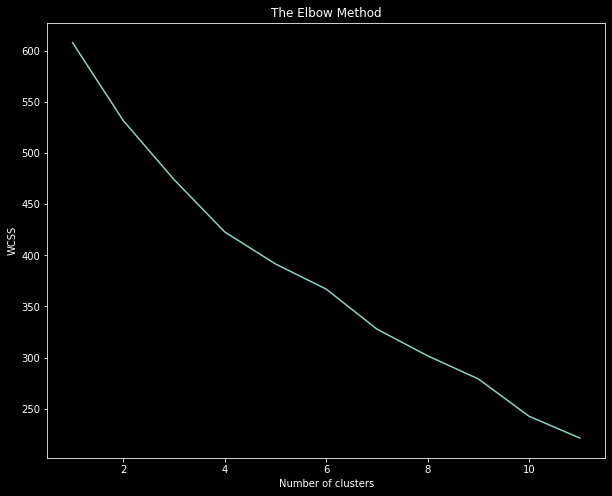

Cluster 0: ['artificial intelligence', 'data analysis', 'machine learning', 'risk analytics', 'cybersecurity', 'data wrangling', 'big data', 'from data', 'deep learning', 'nosql', 'statistical analysis', 'mapreduce', 'data visualization']
Cluster 1: ['java', 'experimentation', 'azure', 'modelling', 'software development', 'power bi', 'cloud computing', 'tableau']
Cluster 2: ['healthcare', 'problem solving', 'problem-solving skills', 'communications', 'presentation skills', 'teamwork']
Cluster 3: ['python', 'sql']
Cluster 4: ['statistics', 'r', 'nlp']


In [223]:
# Step 2: Elbow Method
wcss = []
for i in range(1, 12):  # Test for 1 to 11 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters where the WCSS begins to level off
optimal_clusters = 5

# Step 3: Course Curriculum Development
# Apply K-means with the optimal number of clusters determined from the elbow method
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans_final.fit_predict(features_scaled)

# Add the cluster labels to your dataframe
features_df['Cluster'] = clusters

# Print out the skills in each cluster
for i in range(optimal_clusters):
    print(f"Cluster {i}: {features_df[features_df['Cluster'] == i].index.tolist()}")

# This list of skills per cluster can be interpreted as a course curriculum


In [200]:
# Define the courses based on the clusters, distributing skills to ensure each course has at least three skills
courses = {
    "Course 1: Data Science Fundamentals": ['data analysis', 'statistics', 'data wrangling', 'statistical analysis'],
    "Course 2: Big Data and Cloud Technologies": ['big data', 'cloud computing', 'azure', 'nosql', 'mapreduce'],
    "Course 3: Machine Learning and AI": ['machine learning', 'artificial intelligence', 'deep learning', 'nlp'],
    "Course 4: Programming for Data Science": ['java', 'python', 'r'],
    "Course 5: Cybersecurity and Risk Management": ['cybersecurity', 'risk analytics', 'data privacy', 'experimentation'],
    "Course 6: Data Visualization and Business Intelligence": ['tableau', 'data visualization', 'power bi'],
    "Course 7: Software Development Practices": ['software development', 'modelling', 'from data'],
    "Course 8: Communication and Problem-Solving Skills": ['problem solving', 'communications', 'presentation skills', 'teamwork'],
    "Course 9: Specialized Topics in Data Science": ['healthcare', 'modeling', 'experimentation']
}

# Add the remaining skills to courses where they fit best logically
courses["Course 2: Big Data and Cloud Technologies"].append('from data')  # If 'from data' is related to cloud data services
courses["Course 5: Cybersecurity and Risk Management"].append('modelling')  # If 'modelling' here refers to risk models

# Print out the courses and their skills
for course_name, skills in courses.items():
    print(f"{course_name}: {', '.join(skills)}", end='\n\n')

Course 1: Data Science Fundamentals: data analysis, statistics, data wrangling, statistical analysis

Course 2: Big Data and Cloud Technologies: big data, cloud computing, azure, nosql, mapreduce, from data

Course 3: Machine Learning and AI: machine learning, artificial intelligence, deep learning, nlp

Course 4: Programming for Data Science: java, python, r

Course 5: Cybersecurity and Risk Management: cybersecurity, risk analytics, data privacy, experimentation, modelling

Course 6: Data Visualization and Business Intelligence: tableau, data visualization, power bi

Course 7: Software Development Practices: software development, modelling, from data

Course 8: Communication and Problem-Solving Skills: problem solving, communications, presentation skills, teamwork

Course 9: Specialized Topics in Data Science: healthcare, modeling, experimentation



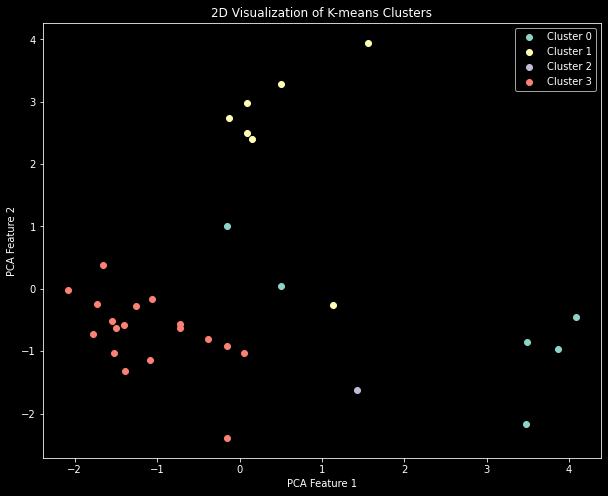

In [224]:
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Determine the optimal number of clusters and fit the k-means model
optimal_clusters = 4  
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans_final.fit_predict(features_scaled)

# Reduce the features to 2D using PCA for visualization
pca_2d = PCA(n_components=2)
features_2d = pca_2d.fit_transform(features_scaled)

# Plot the clustered data in 2D
plt.figure(figsize=(10, 8))
for i in range(optimal_clusters):
    plt.scatter(features_2d[cluster_labels == i, 0], features_2d[cluster_labels == i, 1], label=f'Cluster {i}')

plt.title('2D Visualization of K-means Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()